# Business Analytics
## Simulation
(C) 2021

In [1]:
from IPython.display import HTML, display

def optional_material():
    '''
    When run in a cell, this function will color the cell blue to indicate
    the material is optional
    '''
    script =  "var cell = this.closest('.code_cell');"
    script += "var editor = cell.querySelector('.input_area');"
    script += "editor.style.background='#bde4f0';"
    script += "this.parentNode.removeChild(this)"
    
    display(HTML(f'<img src onerror="{script}">'))
    
optional_material()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:900px !important; }</style>"))

# Random numbers in Python

In [2]:
import numpy as np

In [3]:
np.random.seed(123)

In [4]:
np.random.uniform(size=10)

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
       0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752])

In [5]:
np.random.binomial(n=1, p=0.4, size=10)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [6]:
np.random.normal(loc=0, scale=1, size=10)

array([ 1.0040539 ,  0.3861864 ,  0.73736858,  1.49073203, -0.93583387,
        1.17582904, -1.25388067, -0.6377515 ,  0.9071052 , -1.4286807 ])

# Simulation in Python

In [7]:
def average_n_tests(p, n=5000, seed=123):
    '''
    This function uses simulation to calculate the number of
    COVID tests required per individual when using a pooled-
    testing procedure, pooling 5 tests at once.
    
    It accepts four arguments:
      - p: the proportion of the population that is COVID
           positive
      - n: the number of simulations to use
      - seed: the seed to use for the simulation
    
    It returns the average number of tests required over all
    simulations.
    '''
    
    # Seed the random number generator
    np.random.seed(seed)
    
    # Create a list to store the number of tests per person
    # required in each of our simulations
    n_tests = []

    for i in range(n):
        # Simulate the five people we're pooling; each will be
        # drawn from a Bernoulli random variable with probability
        # equal to the proportion of the population that is
        # COVID +ive
        s = np.random.binomial(n=1, p=p, size=5)
        
        if max(s) == 1:
            # If max(s) is 1, then at least once person is +ve;
            # the outcome of the test will be a bernouli RV
            # with p=0.9 (the sensitivity of the test)
            T = np.random.binomial(n=1, p=0.9)
        else:
            # If max(s) is 0, then everyone in the pool is
            # negative
            T = np.random.binomial(n=1, p=0.02)
        
        if T == 0:
            # If the test was negative, it only takes one test
            # to test someone
            n_tests.append(0.2)
        else:
            # If the test was positive, we need to test every
            # person again, so it takes 1.2 tests per person
            n_tests.append(1.2)
    
    return np.mean(n_tests)

In [8]:
average_n_tests(0.2)

0.7999999999999999

In [9]:
average_n_tests(0.9)

1.0928

In [10]:
ps = np.linspace(0, 1, num=30)
av_n_tests = [average_n_tests(p) for p in ps]

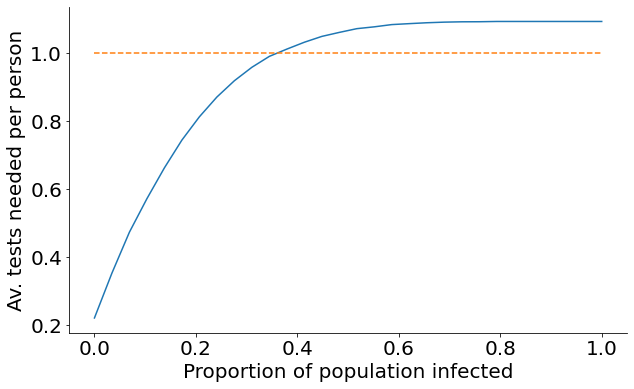

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.plot(ps, av_n_tests)
plt.plot([0, 1], [1, 1], linestyle='--')
plt.xlabel('Proportion of population infected', fontsize=20)
plt.ylabel('Av. tests needed per person', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

# Simulation Accuracy

In [12]:
def average_n_tests(p, n=5000, seed=123):
    '''
    This function uses simulation to calculate the number of
    COVID tests required per individual when using a pooled-
    testing procedure, pooling 5 tests at once.
    
    It accepts four arguments:
      - p: the proportion of the population that is COVID
           positive
      - n: the number of simulations to use
      - seed: the seed to use for the simulation
    
    It returns a list containing the average number of tests
    required over all simulations, as well as the standard
    deviation of that number.
    '''
        
    # Seed the random number generator
    np.random.seed(seed)
    
    # Create a list to store the number of tests per person
    # required in each of our simulations
    n_tests = []

    for i in range(n):
        # Simulate the five people we're pooling; each will be
        # drawn from a Bernoulli random variable with probability
        # equal to the proportion of the population that is
        # COVID +ive
        s = np.random.binomial(n=1, p=p, size=5)
        
        if max(s) == 1:
            # If max(s) is 1, then at least once person is +ve;
            # the outcome of the test will be a bernouli RV
            # with p=0.9 (the sensitivity of the test)
            T = np.random.binomial(n=1, p=0.9)
        else:
            # If max(s) is 0, then everyone in the pool is
            # negative
            T = np.random.binomial(n=1, p=0.02)
        
        if T == 0:
            # If the test was negative, it only takes one test
            # to test someone
            n_tests.append(0.2)
        else:
            # If the test was positive, we need to test every
            # person again, so it takes 1.2 tests per person
            n_tests.append(1.2)
    
    return [np.mean(n_tests), np.std(n_tests)]

In [13]:
n = 5000
mu, sigma = average_n_tests(0.2, n=n)
print(f'95% CI: {round(mu - 1.96*sigma/np.sqrt(n),4)}-{round(mu + 1.96*sigma/np.sqrt(n),4)}')

95% CI: 0.7864-0.8136


In [14]:
from tqdm import tqdm

means = []

for i in tqdm(range(500)):
    mu, _ = average_n_tests(0.2, n=n, seed=i)
    means.append(mu)

100%|██████████| 500/500 [00:13<00:00, 36.03it/s]


In [15]:
np.quantile(means, 0.025)

0.798295

In [16]:
np.quantile(means, 0.975)

0.8253050000000001

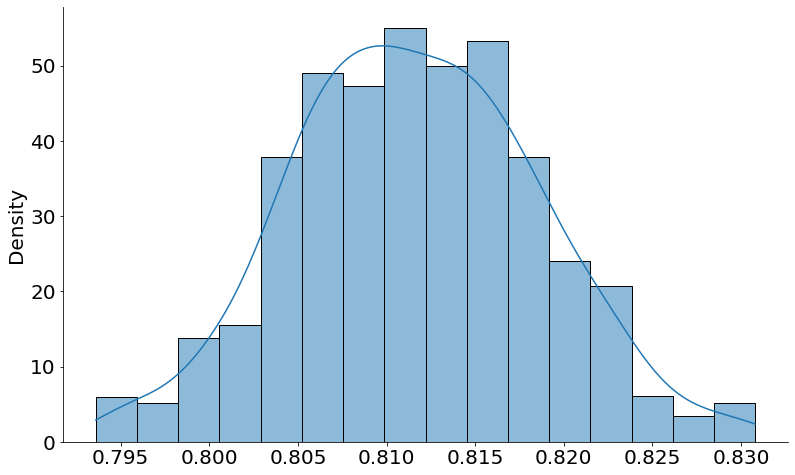

In [17]:
import seaborn as sns

plt.figure(figsize=(13, 8))
sns.histplot(means, stat='density', kde=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Density', fontsize=20)
sns.despine()

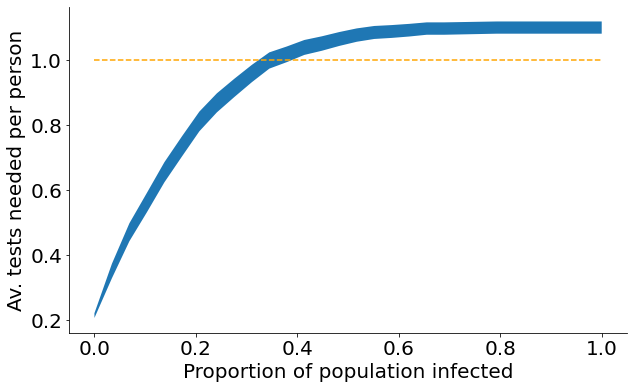

In [18]:
n = 1000

ps = np.linspace(0, 1, num=30)
sim_results = [average_n_tests(p, n = n) for p in ps]

av_n_tests = [i[0] for i in sim_results]
sd_n_tests = [i[1] for i in sim_results]

ucl = [i + 1.96*j/np.sqrt(n) for i, j in zip(av_n_tests, sd_n_tests)]
lcl = [i - 1.96*j/np.sqrt(n) for i, j in zip(av_n_tests, sd_n_tests)]

plt.figure(figsize=(10, 6))
plt.fill_between(ps, lcl, ucl)
plt.plot([0, 1], [1, 1], linestyle='--', color='orange')
plt.xlabel('Proportion of population infected', fontsize=20)
plt.ylabel('Av. tests needed per person', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

# Pension Liabilities at GM

## Pro-forma analysis

In [19]:
def pro_forma_liability(age_at_death):
    '''
    This function uses a pro-forma analysis to calculate the net-
    present value of the pension healthcare liabilities for a
    worker that is 65 in 2013 and dies at age_at_death
    '''
    
    # Growth rate of healthcare costs
    cost_growth = 0.085
    
    # Discount rate
    discount_r  = 0.05
    
    # Initialize the variables with the first year, age, and cost
    # The total liability starts at 0
    year = 2013
    age  = 45
    cost = 10
    total_liability = 0
    
    # Loop through all the years from now until the employee dies
    for y in range(age_at_death - age):
        # Only track costs if the age is >= 65; else the employer
        # isn't paying for this liability
        if age >= 65:
            total_liability += cost/((1+discount_r)**y)
        
        # Update the year, age, and healthcare cost
        year += 1
        age  += 1
        cost *= (1+cost_growth)
            
    return total_liability

In [20]:
pro_forma_liability(78)

307.22630336630107

In [21]:
pro_forma_liability(66)

19.26676420332768

In [22]:
pro_forma_liability(90)

734.0187643084853

## Jensen's Inequality

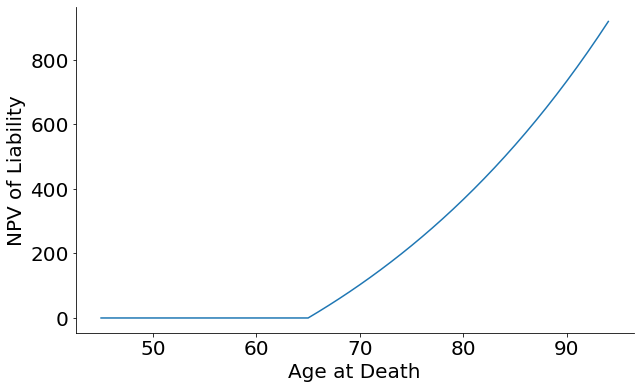

In [23]:
age_at_death = range(45,95)
npv = [pro_forma_liability(i) for i in age_at_death]

plt.figure(figsize=(10, 6))
plt.plot(age_at_death, npv)
plt.xlabel('Age at Death', fontsize=20)
plt.ylabel('NPV of Liability', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

## Simulating age of Death

In [24]:
import pandas as pd
df_actuarial = pd.read_excel('/Users/gujiajun/Downloads/actuarial tables.xlsx', skiprows=3)
df_actuarial.head()

,age,Death probability,Life expectancy,Death probability.1,Life expectancy.1,Unnamed: 5,Unnamed: 6
0,0,0.006990,75.90,0.005728,80.81,NaN,a Probability of dying within one year.
1,1,0.000447,75.43,0.000373,80.28,NaN,Note: The period life expectancy at a given a...
2,2,0.000301,74.46,0.000241,79.31,NaN,The Social Security area population is compris...
3,3,0.000233,73.48,0.000186,78.32,NaN,NaN
4,4,0.000177,72.50,0.000150,77.34,NaN,NaN


In [25]:
df_actuarial = df_actuarial.iloc[:,:3]
df_actuarial = df_actuarial.set_index('age')
df_actuarial.head()

,Death probability,Life expectancy
age,,
0,0.006990,75.90
1,0.000447,75.43
2,0.000301,74.46
3,0.000233,73.48
4,0.000177,72.50


In [26]:
def simulate_death_age():
    '''
    This function goes through every age from 45 to 119 and simulates
    the probability of death at that age. As soon as one of the
    simulations returns 1, that age is returned as the age of death
    '''
    
    for age in range(45, 120):
        if np.random.binomial(n=1, p=df_actuarial.loc[age, 'Death probability']) == 1:
            return age

In [27]:
np.random.seed(123)
print(simulate_death_age())
print(simulate_death_age())
print(simulate_death_age())

83
90
51


In [28]:
np.mean([simulate_death_age() for i in range(5000)])

78.2484

### Back to GM

In [29]:
n = 5000

liability_npv = []

np.random.seed(123)

for i in tqdm(range(n)):
    liability_npv.append(pro_forma_liability(simulate_death_age()))

100%|██████████| 5000/5000 [00:01<00:00, 2600.64it/s]


In [30]:
mean_liability = np.mean(liability_npv)
se_liability = np.std(liability_npv)/np.sqrt(n)

In [31]:
print(f'95% CI: {round(mean_liability - 1.96*se_liability,2)}-{round(mean_liability + 1.96*se_liability,2)}')

95% CI: 392.55-410.08


### Estimating probabilities

In [32]:
n = 5000

x = []

np.random.seed(123)

for i in tqdm(range(n)):
    x.append(1 if simulate_death_age() >= 65 else 0)

100%|██████████| 5000/5000 [00:01<00:00, 2696.21it/s]


In [33]:
np.mean(x)

0.8546